# Dark Sky API
Documentation: https://darksky.net/dev/docs#time-machine-request

## Forecast Request
hourly only: 
https://api.darksky.net/forecast/[key]/[latitude],[longitude]?units=si&lang=pt&exclude=currently,flags,alerts,daily


## Test location
* LATITUDE: -23.535521
* LONGITUDE: -46.763048

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import dates as mdate
import json, pandas
import datetime as dt

pandas.options.display.float_format = "{:.3f}".format
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Converting Dark Sky API response to DataFrame
*result* is a valid response of forecast request
```python
data = pandas.DataFrame(data=result["hourly"]["data"])
data.set_index('time', inplace=True)
```

In [3]:
hourly_forecast= pandas.read_pickle('./weather_forecast_darksky_dataset.pkl')
#START: 1609243200 => Tuesday, December 29, 2020 9:00:00 AM GMT-03:00
#END:  1609416000  => Thursday, December 31, 2020 9:00:00 AM GMT-03:00

In [22]:
PRECIPITATION_PROBABILITY_THRESHOLD=0.25
PRECIPITATION_FORECAST_TIME_AHEAD=3*3600
    
def will_fall_rain():
    will_rain = False
    now = int(dt.datetime.now().timestamp())
    will_rain =  len(hourly_forecast[
        (
            (hourly_forecast.index >= now ) & 
            (hourly_forecast.index < now + PRECIPITATION_FORECAST_TIME_AHEAD)
        ) & (
            (hourly_forecast['precipProbability'] >= PRECIPITATION_PROBABILITY_THRESHOLD) | 
            (hourly_forecast['icon'] == 'rain')
          ) ]) > 0
    return will_rain
will_fall_rain()

True

In [4]:
list(hourly_forecast)

['summary',
 'icon',
 'precipIntensity',
 'precipProbability',
 'precipType',
 'temperature',
 'apparentTemperature',
 'dewPoint',
 'humidity',
 'pressure',
 'windSpeed',
 'windGust',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility',
 'ozone']

* **summary**:A human-readable text summary of this data point. (This property has millions of possible values, so don’t use it for automated purposes: use the icon property, instead!)
* **icon**:A machine-readable text summary of this data point, suitable for selecting an icon for display. 
* **precipIntensity**:The intensity (in inches of liquid water per hour) of precipitation occurring at the given time. This value is conditional on probability (that is, assuming any precipitation occurs at all).
* **precipProbability**:The probability of precipitation occurring, between 0 and 1, inclusive.
* **precipType**:The type of precipitation occurring at the given time. If defined, this property will have one of the following values: "rain", "snow", or "sleet" (which refers to each of freezing rain, ice pellets, and “wintery mix”). (If precipIntensity is zero, then this property will not be defined. Additionally, due to the lack of data in our sources, historical precipType information is usually estimated, rather than observed.)
* **temperature**:The air temperature in degrees.
* **apparentTemperature**:The apparent (or “feels like”) temperature in degrees.
* **dewPoint**:The dew point in degrees.
* **humidity**:The relative humidity, between 0 and 1, inclusive.
* **pressure**:The sea-level air pressure in millibars.
* **windSpeed**:The wind speed.
* **windGust**:The wind gust speed.
* **windBearing**:The direction that the wind is coming from in degrees, with true north at 0° and progressing clockwise. (If windSpeed is zero, then this value will not be defined.)
* **cloudCover**:The percentage of sky occluded by clouds, between 0 and 1, inclusive.
* **uvIndex**:The UV index.
* **visibility**:The average visibility in miles, capped at 10 miles.
* **ozone**:The columnar density of total atmospheric ozone at the given time in Dobson units.
source: https://darksky.net/dev/docs#response-format

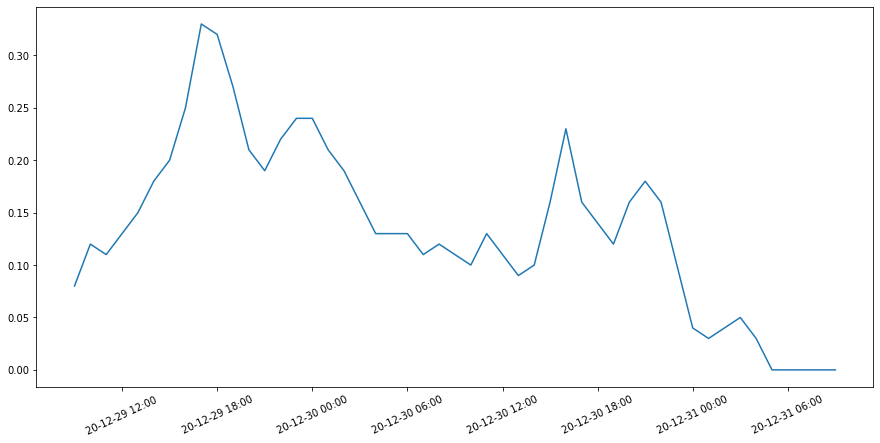

In [5]:
# UTILS
 
plt.rcParams['figure.figsize'] = [15,7]
plt.rcParams['timezone'] = 'America/Sao_Paulo'

fig,ax = plt.subplots()
x = mdate.epoch2num(hourly_forecast.index)
fmt = mdate.DateFormatter('%y-%m-%d %H:%M')

ax.xaxis.set_major_formatter(fmt)
plt.xticks( rotation=25 )
plt.plot_date(x, hourly_forecast.precipProbability, linestyle='solid', marker='None')
plt.show()